# Finite Arithmetic and Error Analysis 
[Ref](https://www.unioviedo.es/compnum/labs/lab02_error/lab02_error.html)

## Binary and Decimal Systems


In [1]:
%run "000_shared_lib.ipynb"

In [2]:
def decimal_to_binary(num, dp=5):
    res = []
    
    def traverse(n, gcounter=0): 
        n = abs(n)
        if n>=1:
            t = n//2
            res.append( n % 2 )
            if t > 0:
                traverse( t )
        else:
            q = int(n*2)
            t = (n*2) - q
            res.append( q )
            if t < 1 and gcounter<dp:
                traverse( t , gcounter+1)
                
    traverse(num)
    return "".join( [str(i) for i in res] )
    #return res
        
        
        

In [3]:
print("Decimal\tBinary")
# outstr = "{%2d} {%s}".format(d=d, b=b)
for i in range(0,10):
    print(f"{i}: \t{decimal_to_binary(i)}" )
#     print( outstr.format(i, decimal_to_binary(i)) )

##TODO: fix infinite loop
for i in range(0,10):
    it = i/10
    print(f"{it}: \t{decimal_to_binary(it)}" )

Decimal	Binary
0: 	000000
1: 	1
2: 	01
3: 	11
4: 	001
5: 	101
6: 	011
7: 	111
8: 	0001
9: 	1001
0.0: 	000000
0.1: 	000110
0.2: 	001100
0.3: 	010011
0.4: 	011001
0.5: 	100000
0.6: 	100110
0.7: 	101100
0.8: 	110011
0.9: 	111001


In [4]:
decimal_to_binary(0.1, 30)

'0001100110011001100110011001100'

In [5]:
decimal_to_binary(80)

'0000101'

---
## More Math
- [Non-linear FUnctions - Zeros and Roots](https://www.unioviedo.es/compnum/labs/lab04_ne/lab04_ne.html)
- [Polynomials](https://www.unioviedo.es/compnum/labs/lab05_approximation/lab05_approximation.html)
- [Interpolation and Polynomial approx](https://www.unioviedo.es/compnum/labs/lab05_interpol/lab05_interpol.html)
    - lgarange 


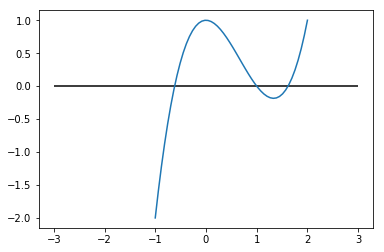

In [6]:
x = np.linspace(-100,100)
# x = np.random.random(10)
x = np.linspace(-1,2)

y= x**3 - 2*x**2 + 1

plt.plot(x, y); 
plt.hlines(0, -3, 3); 

# Interpolation - Image Processing
Transformations
- Shear
- Rotate
- Scale 
- Straighten objects 
- Non-linear e.g. 
    - whirlpool
    - funny faces
    - lense/fish-eye
    - 

# Fourier APproximations
[Source](https://www.unioviedo.es/compnum/labs/lab06_applications/lab06_applications.html)


Applications:
-

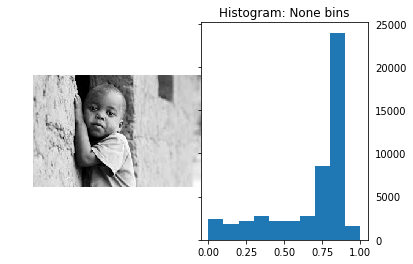

In [7]:
img = AnImage("media/img2.jpeg")
img.show()

In [8]:
def d_fourier_transform(img, show=True):
    M, N = img.shape 
    outsie = np.zeros_like(img)
    #TODO: vectorize
    for i in range(M):
        for j in range(N):
            k, l = i, j
            outsie[k, l] = img[i,j] * np.exp( (-2*np.pi)*(k*(i/M)+l*(j/N))  )                                         
    if show:
        show_image_list([img, outsie], titlez=['origi', 'fourier'])
    
    
def np_dft(img, show=True):
    outsie = np.fft.fft2(img )
    
    if show:
        show_image_list([img, outsie], titlez=['origi', 'fourier'])
    

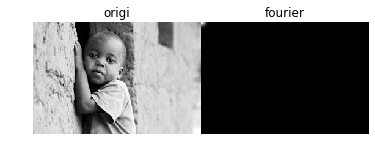

In [9]:
d_fourier_transform(img.img)
# np_dft(img.img)

In [10]:
def rgb_to_hsv(img, show=True):
    
    def pixel_op(pixel):
#         print(f"pixel:{pixel} ")
        H, S, V = 0, 0, 0
        r, g, b = pixel
        c_N = 255
        c_max = np.max(pixel)
        c_min = np.min(pixel)
        c_range = c_max - c_min
        
        # 1. V value 
        V = c_max/c_N
        
        # 2. S saturation 
        if c_max > 0:
            S = c_range /c_max 
        
        # 3. H hue, which is only defined for color pixels
        if c_range > 0:
            rr = (c_max - r)/c_range
            gg = (c_max - g)/c_range
            bb = (c_max - b)/c_range
            
            if r == c_max:
                hh = bb - gg
            elif g == c_max:
                hh = rr - bb + 2
            else:
                hh = gg - rr + 4
            
            if hh < 0:
                hh = hh + 6 
                
            H = hh/6
        
        return np.array([H, S, V])
    
    outsie = np.zeros_like(img)
    h, w, c = img.shape 
    for i in range(h):
        for j in range(w):
            outsie[i, j, :] = pixel_op(img[i,j,:]) 
            
    if show:
        show_image_list([img, outsie], titlez=['origi', 'hsv'])

# Color Image Processing
[Source](https://web.cs.wpi.edu/~emmanuel/courses/cs545/S14/slides/lecture09.pdf)

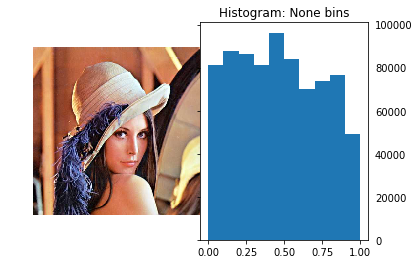

In [11]:
img2 = AnImage("media/lena.jpg", False)
img2.show()

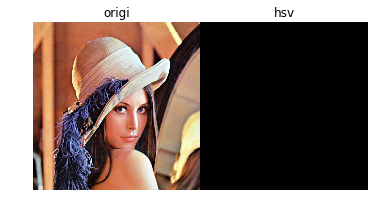

In [12]:
rgb_to_hsv(img2.img)

In [13]:
def rgb_to_yuv(img, show=True):
    trans_YUV = np.array([
        [299, 587, 114],
        [-147, -289, 436],
        [615, 515, 100]
    ])*(1/1000)
    
    outsie = img @ trans_YUV
    
    if show:
        show_image_list([img, outsie], titlez=['origi', 'yuv'])
        
def rgb_to_srgb(img, show=True):
    trans_YUV = np.array([
        [3.240479, -1.537150, -0.498535],
        [-0.969256, 1.875992, 0.041556],
        [0.055648, -0.204043, 1.057311]
    ])
    
    outsie = img @ trans_YUV
    
    if show:
        show_image_list([img, outsie], titlez=['origi', 'sRGB'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


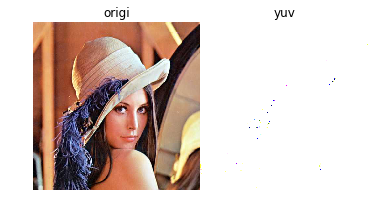

In [14]:
rgb_to_yuv(img2.img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


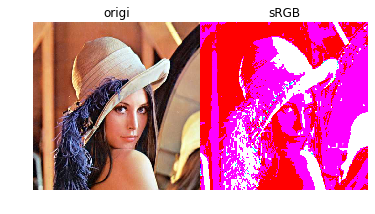

In [15]:
rgb_to_srgb(img2.img)

In [16]:
def color_distance(img1, img2, show=True):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    
    
    
    if show:
        show_image_list([img, outsie], titlez=['origi', 'yuv'])
        
        
def color_distance(img, show=True):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    p1 = np.linalg.norm(r - g)
    p2 = np.linalg.norm(r - b)
    p3 = np.linalg.norm(b - g)
    
    outsie = np.zeros_like(img)
    outsie[:,:,0] = p1
    outsie[:,:,1] = p2
    outsie[:,:,2] = p3
    
    outsie = outsie * img
    
    if show:
        show_image_list([img, outsie], titlez=['origi', 'L2 Distance'])

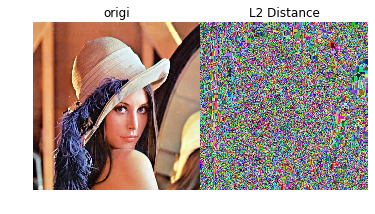

In [17]:
color_distance(img2.img)

In [18]:
def diff_colors_contig(img, show=True):
    nr, nc, _ = img.shape
    
    def diff_contig(pixel, prev):
        return pixel - prev 
    
    outsie = np.zeros_like(img)
    pixel = None 
    for i in range(nr):
        for j in range(nc): 
            if pixel is None:
                outsie[i,j,:] = img[i,j,:]
            else:
                outsie[i,j,:] = diff_contig(img[i,j,:], pixel)
            pixel = img[i,j,:]
            
            
    mult = outsie*img
    diff = skimage.color.rgb2gray(img + outsie*-1)
    
    
    if show:
        show_image_list([img, outsie, mult, diff], titlez=['origi', 'Diff Consec', 'Multiple', 'Sum'])
        
    return diff

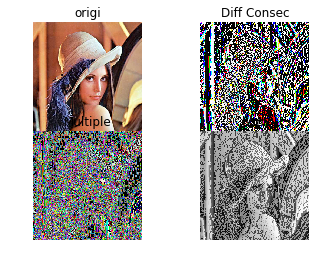

In [19]:
o = diff_colors_contig(img2.img)

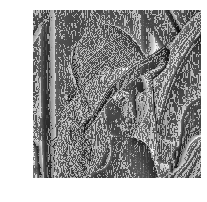

In [20]:
show_image_list([skimage.color.rgb2gray(img2.denoised(27)) + o*-100 ])

In [23]:
def color_quantization(img, nb=1, show=True):
    nr, nc, _ = img.shape
    cmin = img.min()
    cmax = img.max()
    crange = cmax - cmin
    nmin = 0
    nmax = 2**nb 
    nrange = nmax - nmin 
    
    def get_new_color(pixel):
        return ((pixel - cmin) * (nrange/crange)*(pixel-cmax)) + cmin
        
    outsie = np.zeros_like(img)
    for i in range(nr):
        for j in range(nc): 
            outsie[i,j,:] = get_new_color(img[i,j,:])

    if show:
        show_image_list([img, outsie], titlez=['origi', 'New Color'])
        
    return outsie

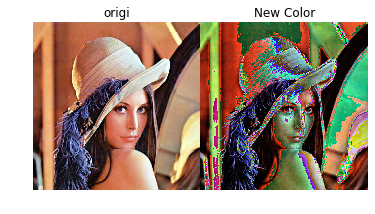

In [24]:
o2 = color_quantization(img2.img)

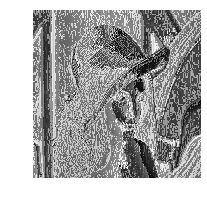

In [27]:
show_image_list([skimage.color.rgb2gray(img2.denoised(29)+o2) + o*-100 ])